# Forbes Highest Paid Athletes 1990 - 2020

- Data downloaded from kaggle
- Data contains athelete names, nationality, sport, earnings, and year
- Each year has 10 athletes with highest earnings
- Using this data to find out how much athlete's earning grows from 1990 to 2020

## Import data

In [3]:
import pandas as pd
data = pd.read_csv("Forbes_Athletes.csv")
data.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


## Data Prep

In [4]:
# Deleting S.No Column
data1 = data.copy()
data1.drop("S.NO", axis=1 ,inplace = True)

In [5]:
# Checking data types
data1.dtypes

Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [6]:
# Change Year type to datetime
data1.Year = data1.Year.apply(pd.to_datetime, format='%Y')
data1.Year = pd.DatetimeIndex(data1.Year).year

# Set Year as index
data1.set_index('Year', inplace=True)

In [23]:
# Capitalize each word in Sport column
data1.Sport = data1.Sport.str.upper()
data1.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
Year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


## Highest Paid Athletes in 2020

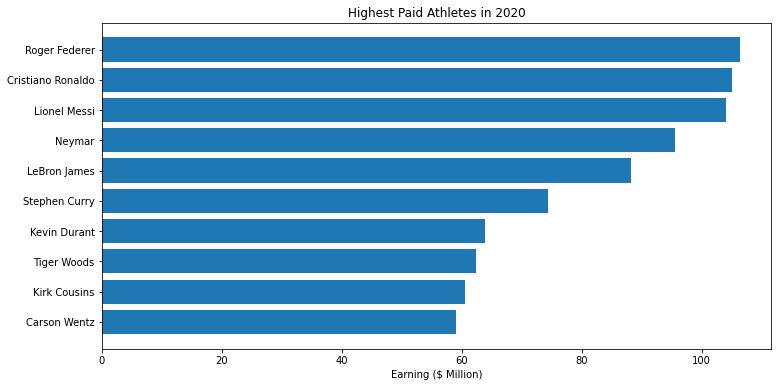

In [24]:
import matplotlib.pyplot as plt
data_2020 = data1[data1.index == 2020].sort_values(by=['earnings ($ million)'])
plt.figure(figsize=(12,6))
plt.barh(data_2020['Name'], data_2020['earnings ($ million)'])
plt.title('Highest Paid Athletes in 2020')
plt.xlabel('Earning ($ Million)')
plt.show()

## Highest Paid Athletes in 1990

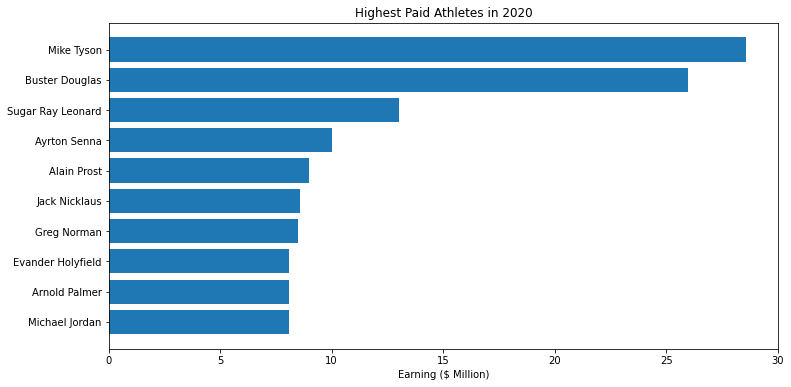

In [9]:
data_1990 = data1[data1.index == 1990].sort_values(by=['earnings ($ million)'])
plt.figure(figsize=(12,6))
plt.barh(data_1990['Name'], data_1990['earnings ($ million)'])
plt.title('Highest Paid Athletes in 2020')
plt.xlabel('Earning ($ Million)')
plt.show()

## Highest Paid Athletes for Each Year from 1990 - 2020

In [25]:
Top_paid_each_year = data1[data1['Current Rank'] == 1].sort_values(by='Year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]
z.style.background_gradient(cmap='Reds')  

,Name,Sport,Nationality,earnings ($ million)
Year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


## Top 10 Athletes with Maximum Time Included in the List

In [26]:
max_time = data1.Name.value_counts().to_frame()[:10]
max_time.style.background_gradient(cmap='Reds')

,Name
Michael Jordan,19
Tiger Woods,19
Kobe Bryant,14
Michael Schumacher,13
LeBron James,13
Roger Federer,12
Phil Mickelson,11
Cristiano Ronaldo,10
Shaquille O'Neal,9
David Beckham,9


## Athlete's Nationality

In [27]:
nat = (data1.Nationality.value_counts()/data1.shape[0]*100).round(2).to_frame()
nat

,Nationality
USA,68.44
UK,4.32
Germany,4.32
Switzerland,3.99
Portugal,3.32
Argentina,2.99
Brazil,2.99
Canada,1.99
Italy,1.33
France,1.00


## Which sport the most included in the list 

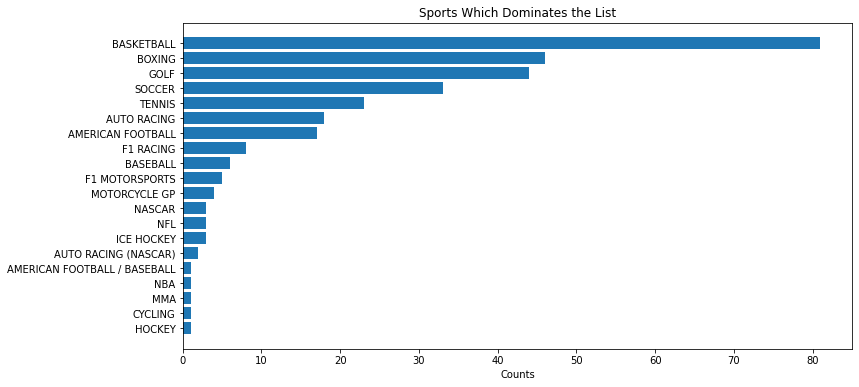

In [37]:
sport_count = data1.Sport.value_counts().to_frame()
sport_count = sport_count.sort_values(by='Sport')
plt.figure(figsize=(12,6))
plt.barh(sport_count.index, sport_count.Sport)
plt.title('Sports Which Dominates the List')
plt.xlabel('Counts')
plt.show()

## Total earning by Sport

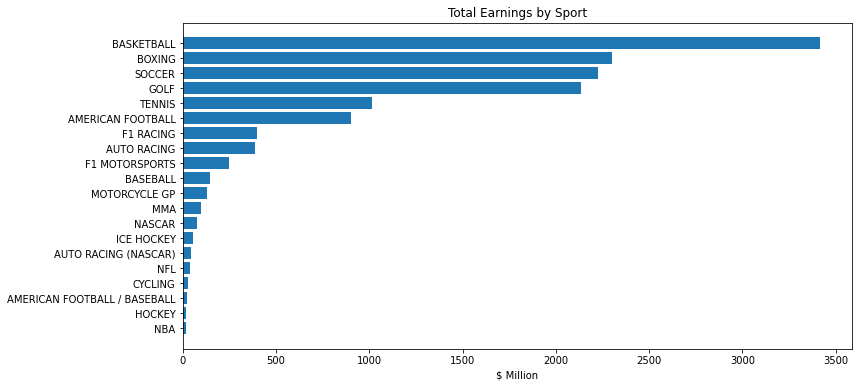

In [66]:
sport_earn = pd.pivot_table(data1, index='Sport', values='earnings ($ million)', aggfunc='sum')
sport_earn = sport_earn.sort_values(by='earnings ($ million)')
plt.figure(figsize=(12,6))
plt.barh(sport_earn.index, sport_earn['earnings ($ million)'])
plt.title('Total Earnings by Sport')
plt.xlabel('$ Million')
plt.show()

## Athlete with largest total earnings

In [45]:
total_earn = pd.pivot_table(data1, index='Name', values='earnings ($ million)', aggfunc='sum')
top3_total = total_earn.sort_values(by='earnings ($ million)', ascending=False)[:3]
top3_total

,earnings ($ million)
Name,
Tiger Woods,1373.8
LeBron James,844.8
Floyd Mayweather,840.0


## Tiger Woods's earning over the years

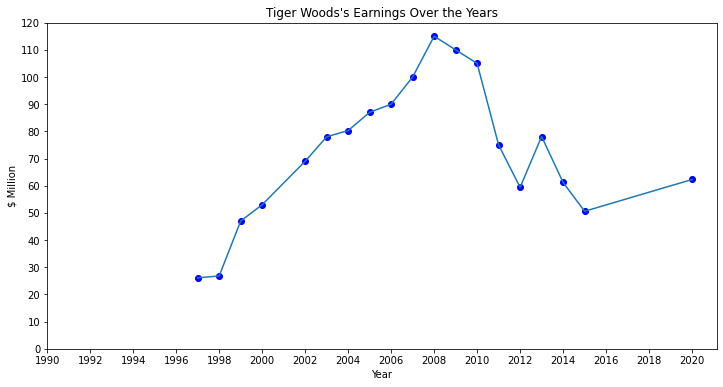

In [56]:
import numpy as np
tgw = data1[data1.Name == 'Tiger Woods']
plt.figure(figsize=(12,6))
plt.scatter(tgw.index, tgw['earnings ($ million)'], c='blue')
plt.plot(tgw.index, tgw['earnings ($ million)'], linestyle='solid')
plt.title("Tiger Woods's Earnings Over the Years")
plt.xticks(np.arange(1990,2021,2))
plt.xlabel('Year')
plt.yticks(np.arange(0,130,10))
plt.ylabel('$ Million')
plt.show()

## LeBron James's earnings over the year

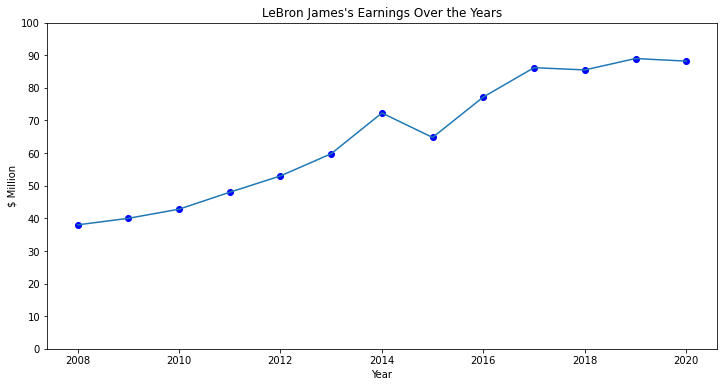

In [62]:
lbj = data1[data1.Name == 'LeBron James']
plt.figure(figsize=(12,6))
plt.scatter(lbj.index, lbj['earnings ($ million)'], c='blue')
plt.plot(lbj.index, lbj['earnings ($ million)'], linestyle='solid')
plt.title("LeBron James's Earnings Over the Years")
plt.xticks(np.arange(2008,2021,2))
plt.xlabel('Year')
plt.yticks(np.arange(0,110,10))
plt.ylabel('$ Million')
plt.show()

## Floyd Mayweather's earnings over the years

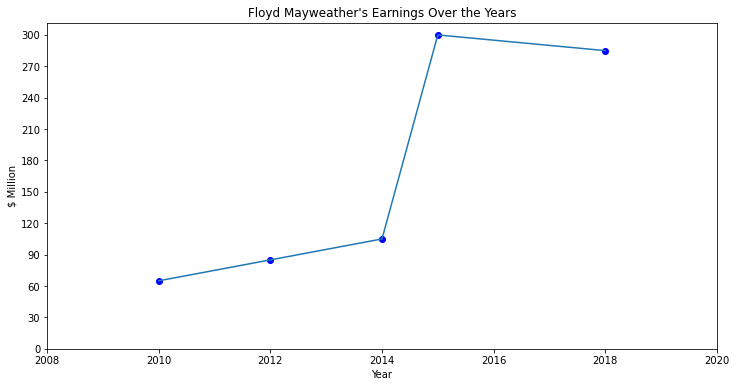

In [61]:
fmw = data1[data1.Name == 'Floyd Mayweather']
plt.figure(figsize=(12,6))
plt.scatter(fmw.index, fmw['earnings ($ million)'], c='blue')
plt.plot(fmw.index, fmw['earnings ($ million)'], linestyle='solid')
plt.title("Floyd Mayweather's Earnings Over the Years")
plt.xticks(np.arange(2008,2021,2))
plt.xlabel('Year')
plt.yticks(np.arange(0,310,30))
plt.ylabel('$ Million')
plt.show()

## Findings

- Roger Federed own the most earning in 2020 with more than 100 million dollar while Mike Tyson as the highest earning athlete  in 1990 only made below 30 million
- Floyd Mayweather has the largest earning with 300 million in 2015 and 285 million in 2018
- 68,44% Athletes with highest earnings come from USA
- Michael Jordan and Tiger Woods mentioned 19 times in the list from 1990 - 2020
- Basketball become sport with the most athlete mentioned in the list with more than 80 times, followed by boxing and golf with almost 50 times mentioned
- Basketball also become sport with largest total earnings with almost 3500 million
- Tiger Woods has the largest total earnings with 1373,8 million, LeBron James in 2nd with 844,8 million, Floyd Mayweather 3rd with 840 million